In [1]:
# Importing necessary libraries

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
tf.__version__

'2.4.1'

In [3]:
# Reading the dataset
df = pd.read_csv('IMDB Dataset.csv')

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
# There are 50k reviews of movies.
df.shape

(50000, 2)

In [6]:
# It's a balanced distribution of both sentiments
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

Encoding the sentiment:  
negative - 0 , positive - 1

In [7]:
df['sentiment'] = df['sentiment'].map({'positive' : 1, 'negative': 0})

In [8]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


Estimation of Vocabulary of Corpus

In [9]:
df_temp = df.copy()

In [10]:
from nltk.corpus import stopwords 
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kushalvala/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
df_temp['review'] = df_temp['review'].str.lower()
df_temp['review'] =  df_temp['review'].apply(lambda x: re.sub(r'\W+|\d+|(br)',' ', str(x)))
df_temp['review'] = df_temp['review'].apply(lambda x: x.rstrip())
df_temp['review'] = df_temp['review'].apply(lambda x : ' '.join([w for w in x.split() if not w in stop_words]))

In [12]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [13]:
df_temp['review'][0]

'one reviewers mentioned watching oz episode hooked right exactly happened first thing struck oz utality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches due lack street skills 

In [14]:
corpus = ' '.join(df_temp['review'].tolist())
word_dist = nltk.FreqDist(corpus.split())

In [15]:
for i in [1000,5000,7500,10000,12000,15000,20000]:
    most_words = word_dist.most_common(i)
    print('Percentage of Corpus captured with %s words is %.2f'%(i,np.sum([int(x[1]) for x in most_words]) / len(corpus.split()) * 100 ))

Percentage of Corpus captured with 1000 words is 57.38
Percentage of Corpus captured with 5000 words is 82.00
Percentage of Corpus captured with 7500 words is 86.86
Percentage of Corpus captured with 10000 words is 89.84
Percentage of Corpus captured with 12000 words is 91.52
Percentage of Corpus captured with 15000 words is 93.36
Percentage of Corpus captured with 20000 words is 95.33


__We will choose 12,000 vocab size for our corpus__

Estimating the length of vector

In [16]:
df_temp.head()

,review,sentiment
0,one reviewers mentioned watching oz episode ho...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically family little boy jake thinks zombie...,0
4,petter mattei love time money visually stunnin...,1


In [17]:
len(df_temp['review'][0].split())

162

In [18]:
corpus_list = df_temp['review'].tolist()

In [19]:
len_review = []
for i in corpus_list:
    len_review.append(len(i.split()))

In [20]:
len_review = np.array(len_review)

In [21]:
print('Average Length of Review:', np.mean(len_review))
print('Std Deviation of Reviews:', np.std(len_review))

Average Length of Review: 118.12304
Std Deviation of Reviews: 89.39626648332914


In [22]:
mean = np.mean(len_review)
std = np.std(len_review)

for i in range(3):
    print('Percentage of Reviews less than or equal to mean + %s standard dev: %.2f'%(i,len(len_review[len_review <= np.mean(len_review) + i * np.std(len_review)]) / len(len_review)))

Percentage of Reviews less than or equal to mean + 0 standard dev: 0.67
Percentage of Reviews less than or equal to mean + 1 standard dev: 0.87
Percentage of Reviews less than or equal to mean + 2 standard dev: 0.95


87% of reviews are less than mean + 1 std dev length, which will be our optimal length of vector.

In [23]:
print('Length of Vector is', np.round(mean+std,2))

Length of Vector is 207.52


In [24]:
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size = 0.2)

In [25]:
X_train.shape, X_test.shape

((40000,), (10000,))

In [26]:
# y_train = tf.keras.utils.to_categorical(y_train, num_classes= 2)
# y_test = tf.keras.utils.to_categorical(y_test, num_classes= 2)

In [27]:
# Load data using tf.data.Dataset

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [28]:
for feat, targ in train_dataset.take(1):
  print('text: ', feat.numpy())
  print('label: ', targ.numpy())

text:  b'Quite simply the funniest and shiniest film-comedy of all time... it\'s certainly on my personal top-ten list. This one also gets a solid ten on the voting scale. Millionaire heir, Arthur Bach (Moore), is a middle-aged \'child\' who refuses to take the mature path in life and avoids all requisite responsibilities. He also refuses to leave the bottle. One day he and his personal butler, Hobson (Gielgud), go shopping at Bergdorf Goodman\'s and run into petty larcenist, Linda (Minnelli). Arthur and Linda\'s chemistry adds electricity to the rest of the film. There are hilarious set pieces aplenty. In one such scene, Arthur (drunk throughout most of the story) knocks on the wrong apartment door and receives ear shattering threats from a human \'siren\' ("My husband has a gun!!!!). Performances by everyone involved should be duly noted: Geraldine Fitzgerald plays Arthur\'s loving-yet-ruthless grandmother, Sir John Gielgud almost steals the entire show with his acidic droll-isms (He

In [29]:
BUFFER_SIZE = 20000
BATCH_SIZE = 512

train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [31]:
# @tf.keras.utils.register_keras_serializable()
# def custom_standardization(input_data):
#     lowercase = tf.strings.lower(input_data)
#     output = tf.strings.regex_replace(lowercase, "\W+|(br)|\d+", " ")
#     return output

In [32]:
VOCAB_SIZE = 5000
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens = VOCAB_SIZE, standardize = 'lower_and_strip_punctuation',
    output_mode = 'int', output_sequence_length = 200,
)

In [33]:
encoder.adapt(train_dataset.map(lambda text, label: text))

In [34]:
vocab = np.array(encoder.get_vocabulary())

In [35]:
for example, label in train_dataset.take(1):
  print('texts: ', example.numpy()[:3])
  print()
  print('labels: ', label.numpy()[:3])

texts:  [b"Well, at least my theater group did, lol. So of course I remember watching Grease since I was a little girl, while it was never my favorite musical or story, it does still hold a little special place in my heart since it's still a lot of fun to watch. I heard horrible things about Grease 2 and that's why I decided to never watch it, but my boyfriend said that it really wasn't all that bad and my friend agreed, so I decided to give it a shot, but I called them up and just laughed. First off the plot is totally stolen from the first one and it wasn't really clever, not to mention they just used the same characters, but with different names and actors. Tell me, how did the Pink Ladies and T-Birds continue years on after the former gangs left? Not to mention the creator face motor cycle enemy, gee, what a striking resemblance to the guys in the first film as well as these T-Birds were just stupid and ridiculous.<br /><br />Another year at Rydell and the music and dancing hasn't 

In [36]:
encoded_example = encoder(example)[:3].numpy()
encoded_example

array([[  74,   31,  219,   54,  785,  526,  111, 4777,   38,    5,  261,
          10,  375,  146,    1,  231,   10,   14,    3,  115,  250,  134,
           9,   14,  108,   54,  502,  685,   40,   67,    9,  122,  127,
        1063,    3,  115,  304,  274,    8,   54,  530,  231,   30,  127,
           3,  165,    5,  249,    6,  104,   10,  542,  489,  178,   43,
           1,  278,    4,  176,  132,   10,  839,    6,  108,  104,    9,
          19,   54, 1399,  296,   12,    9,   65,  277,   32,   12,   83,
           4,   54,  443, 3804,   38,   10,  839,    6,  195,    9,    3,
         315,   19,   10,  467,   93,   57,    4,   41, 1396,   88,  125,
           2,  117,    7,  435, 2499,   36,    2,   88,   29,    4,    9,
         277,   65, 1013,   22,    6,  718,   35,   41,  322,    2,  164,
         102,   19,   16,  269, 1291,    4,  151,  363,   70,   85,  111,
           2, 3773, 2037,    4,    1, 1637,  152,   21,  100,    2, 1082,
           1,  306,   22,    6,  718, 

In [37]:
for n in range(3):
  print("Original: ", example[n].numpy())
  print("Round-trip: ", " ".join(vocab[encoded_example[n]]))
  print()

Original:  b"Well, at least my theater group did, lol. So of course I remember watching Grease since I was a little girl, while it was never my favorite musical or story, it does still hold a little special place in my heart since it's still a lot of fun to watch. I heard horrible things about Grease 2 and that's why I decided to never watch it, but my boyfriend said that it really wasn't all that bad and my friend agreed, so I decided to give it a shot, but I called them up and just laughed. First off the plot is totally stolen from the first one and it wasn't really clever, not to mention they just used the same characters, but with different names and actors. Tell me, how did the Pink Ladies and T-Birds continue years on after the former gangs left? Not to mention the creator face motor cycle enemy, gee, what a striking resemblance to the guys in the first film as well as these T-Birds were just stupid and ridiculous.<br /><br />Another year at Rydell and the music and dancing hasn'

In [38]:
from tensorflow.keras.layers import Bidirectional,LSTM, Dense, Embedding, Dropout, GlobalAveragePooling1D

In [39]:
model = tf.keras.Sequential([
    encoder,
    Embedding(input_dim=len(encoder.get_vocabulary()), output_dim= 256, mask_zero=True),
    GlobalAveragePooling1D(),
    Dropout(0.2),
    Dense(128, activation = 'relu'),
    Dropout(0.2),
    Dense(1, activation = 'sigmoid')])

In [40]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= 0.001), 
              loss = tf.keras.losses.BinaryCrossentropy(from_logits= False), metrics = ['accuracy']
              )

In [41]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset, 
                    validation_steps=5)

Epoch 1/10
79/79 [==============================] - 16s 195ms/step - loss: 0.6557 - accuracy: 0.6175 - val_loss: 0.3913 - val_accuracy: 0.8398
Epoch 2/10
79/79 [==============================] - 15s 187ms/step - loss: 0.3447 - accuracy: 0.8552 - val_loss: 0.3143 - val_accuracy: 0.8699
Epoch 3/10
79/79 [==============================] - 15s 187ms/step - loss: 0.2775 - accuracy: 0.8860 - val_loss: 0.3102 - val_accuracy: 0.8672
Epoch 4/10
79/79 [==============================] - 15s 185ms/step - loss: 0.2554 - accuracy: 0.8938 - val_loss: 0.3101 - val_accuracy: 0.8707
Epoch 5/10
79/79 [==============================] - 15s 186ms/step - loss: 0.2457 - accuracy: 0.8985 - val_loss: 0.3171 - val_accuracy: 0.8672
Epoch 6/10
79/79 [==============================] - 15s 185ms/step - loss: 0.2333 - accuracy: 0.9049 - val_loss: 0.3235 - val_accuracy: 0.8652
Epoch 7/10
79/79 [==============================] - 15s 186ms/step - loss: 0.2270 - accuracy: 0.9098 - val_loss: 0.3311 - val_accuracy: 0.8609

In [42]:
loss, accuracy = model.evaluate(test_dataset)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

20/20 [==============================] - 2s 98ms/step - loss: 0.3395 - accuracy: 0.8614
Loss:  0.3394545316696167
Accuracy:  0.8614000082015991


In [43]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

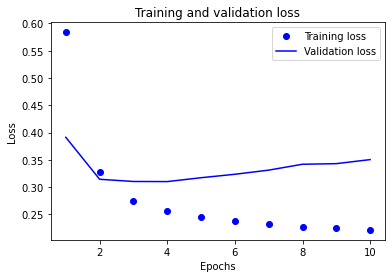

In [44]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

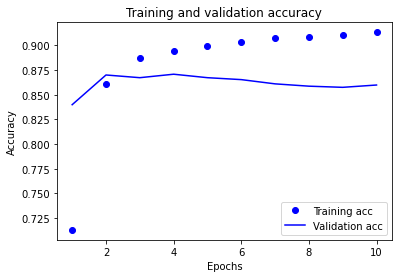

In [45]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [46]:
example = ['GODZILLA VS. KONG is laced with a great story and buildup and the climax battle between the monsters is amazing',
          'The movie was terrible']

In [47]:
model.predict(example)

array([[9.9999976e-01],
       [2.0258773e-12]], dtype=float32)

In [49]:
model.save('tf_keras_imdb')

INFO:tensorflow:Assets written to: tf_keras_imdb/assets


In [50]:
exported_model = tf.keras.models.load_model('tf_keras_imdb/')

In [52]:
exported_model.predict(['GODZILLA VS. KONG is laced with a great story and buildup and the climax battle between the monsters is amazing'])

array([[0.99999976]], dtype=float32)

In [53]:
import requests

In [73]:
import requests

url = 'http://127.0.0.1:8000/predict'
data = {'review': 'GODZILLA VS. KONG is laced with a great story and buildup and the climax battle between the monsters is amazing'}

resp = requests.post(url, json=data)
print(resp.json())

{'prediction': 0.9999997615814209}
